# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [31]:
import numpy as np
class LinearRegression:
    def __init__(self,epochs,alpha):
        self.epochs=epochs
        self.alpha=alpha

    def fit(self,x_train,y_train):
        y_train=y_train.reshape(-1,1)
        alpha=self.alpha
        m=x_train.shape[0]
        n=x_train.shape[1]
        w=np.zeros((n,1))
        b=0

        for i in range(self.epochs):
            y_hat=np.dot(x_train,w)+b
            dj_dw=np.dot(x_train.T,y_hat-y_train)/m
            dj_db=np.sum(y_hat-y_train)/m
            w=w-alpha*dj_dw
            b=b-alpha*dj_db
        return w,b
    
    def predict(self,x_train,y_train,x):
        w,b=self.fit(x_train,y_train)
        y=np.dot(x,w)+b
        return y


        

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('Real estate.csv')
missing_values = df.isnull()
count = missing_values.sum()
df
# no missing/null values

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


<function matplotlib.pyplot.show(close=None, block=None)>

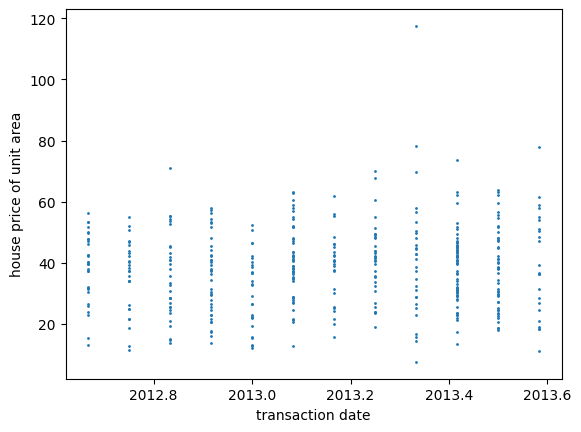

In [2]:
import matplotlib.pyplot as plt
y=df['Y house price of unit area'].values
x1=df['X1 transaction date'].values

plt.scatter(x1,y,s=1)
plt.xlabel('transaction date')
plt.ylabel('house price of unit area')
plt.show

In [2]:
corr_mat=df.corr()
corr_mat

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

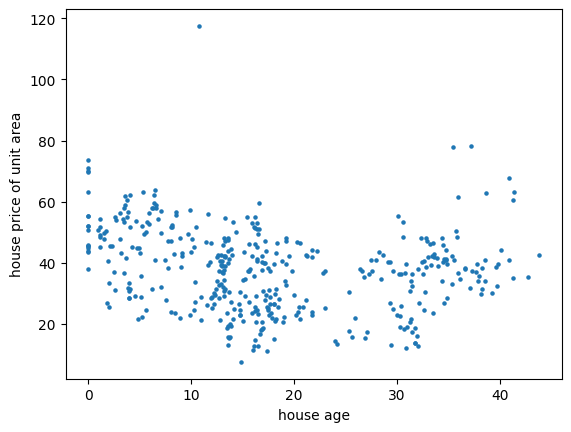

In [3]:
x2=df['X2 house age'].values
plt.scatter(x2,y,s=5)
plt.xlabel('house age')
plt.ylabel('house price of unit area')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

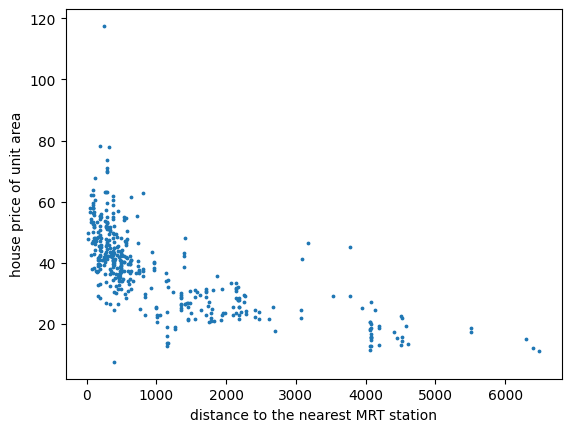

In [4]:
x3=df['X3 distance to the nearest MRT station'].values
plt.scatter(x3,y,s=3)
plt.xlabel('distance to the nearest MRT station')
plt.ylabel('house price of unit area')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

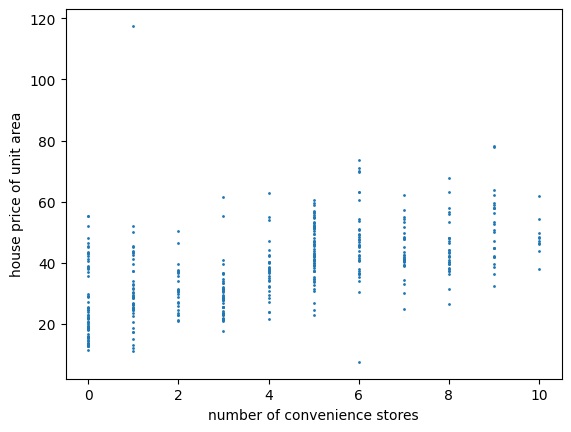

In [5]:
x4=df['X4 number of convenience stores'].values
plt.scatter(x4,y,s=1)
plt.xlabel('number of convenience stores')
plt.ylabel('house price of unit area')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

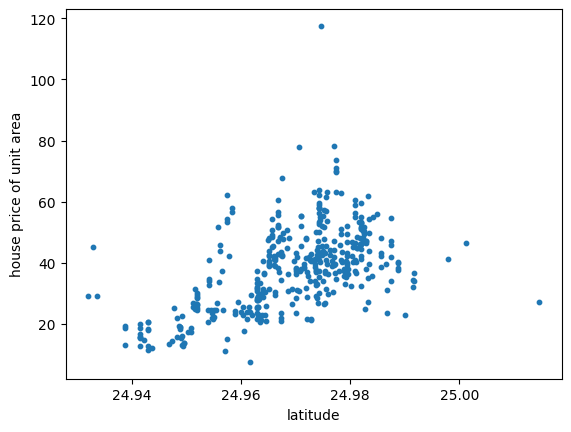

In [6]:
x5=df['X5 latitude'].values
plt.scatter(x5,y,s=10)
plt.xlabel('latitude')
plt.ylabel('house price of unit area')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

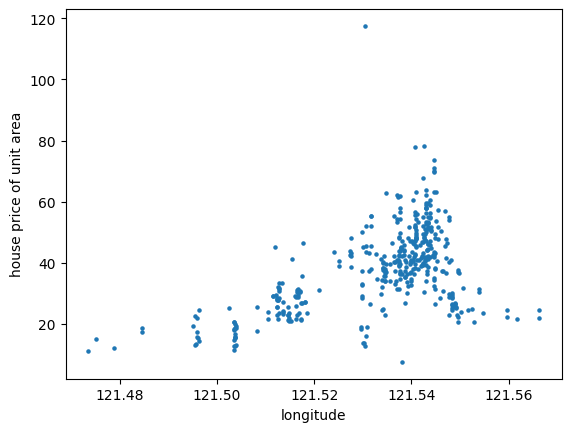

In [7]:
x6=df['X6 longitude'].values
plt.scatter(x6,y,s=5)
plt.xlabel('longitude')
plt.ylabel('house price of unit area')
plt.show

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

#dropping X6 longitude feature
x=np.column_stack((x1,x2,x3,x4,x5))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

lr=LinearRegression(100,0.8)
y_pred=lr.predict(x_train,y_train,x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression model built from scratch")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Linear Regression model built from scratch
Mean Squared Error: 53.399419455446974
R^2 Score: 0.6975716739556224


In [285]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Sklearn Linear Regression Model:")
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Sklearn Linear Regression Model:
Mean Squared Error: 53.17835661174799
R^2 Score: 0.6988236663265559


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [291]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X=data.data
y=data.target
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


5. Write code for the sigmoid function and Logistic regression.


In [287]:
def sigmoid(z):
   m=z.shape[0]
   y_pred=np.zeros((m,1))
   for i in range(m):
       y_pred[i][0]=1/(1+np.exp(-z[i][0]))
   return y_pred
       

def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

class LogReg:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        #Implement the GD algortihm
        for i in range(self.epochs):
            z = np.dot(X,self.weights)+self.bias
            y_pred = sigmoid(z)

            dw = np.dot(X.T,y_pred-y)/n_samples
            db = np.sum(y_pred-y)/n_samples

            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self, X):
      #Write the predict function
        z=np.dot(X,self.weights)+self.bias
        y_pred=sigmoid(z)
        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [292]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
model=LogReg(10,100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"accuracy of my model :{accuracy_score(y_test,y_pred)}")
logr=linear_model.LogisticRegression()
logr.fit(X_train,y_train)
y_pred=logr.predict(X_test)
print(f"accuracy of sklearn model :{accuracy_score(y_test,y_pred)}")

accuracy of my model :0.9736842105263158
accuracy of sklearn model :0.9824561403508771


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [249]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"classification report of my model :{classification_report(y_test, y_pred)}")
print(f"confusion matrix of my model :{confusion_matrix(y_test, y_pred)}")
logr.fit(X_train,y_train)
y_pred=logr.predict(X_test)
print(f"classification report of sklearn model :{classification_report(y_test, y_pred)}")
print(f"confusion matrix of sklearn model :{confusion_matrix(y_test, y_pred)}")

classification report of my model :              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

confusion matrix of my model :[[41  2]
 [ 1 70]]
classification report of sklearn model :              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

confusion matrix of sklearn model :[[41  2]
 [ 0 71]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [152]:
import pandas as pd
df=pd.read_csv('glass.csv')
X=np.array(df.values[:,0:9])
y=np.array(df.values[:,9])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [153]:
from collections import defaultdict
def eucdist(X,x_test):
    m,n=X.shape
    diff=X-x_test
    ed=np.sqrt(np.sum(diff**2,axis=1))
    ed=ed.reshape(-1,1)
    return ed
class KNN:
    def __init__(self,k):
        self.k=k
    def select_knn(self,X_train,y,X_test):
        s=X_test.shape[0]
        m=X_train.shape[0]
        ind=np.arange(0,m).reshape(-1,1)
        y_pred=np.zeros((s,1))
        for i in range(s):
            ed=eucdist(X_train,X_test[i])
            ed=np.column_stack((ind,ed))
            ed=ed[np.argsort(ed[:,1])]
            vote=defaultdict(int)
            for j in range(self.k):
                vote[y[int(ed[j][0])]]=vote[y[int(ed[j][0])]]+1
            y_pred[i]=max(vote, key=vote.get)
        return y_pred

    
    

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [162]:
model=KNN(2)
y_pred=model.select_knn(X_train,y_train,X_test)
print(f"accuracy of my knn model is {accuracy_score(y_test,y_pred)}")

accuracy of my knn model is 0.8372093023255814


In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of sklearn model is:", accuracy)

Accuracy of sklearn model is: 0.8372093023255814
